In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Clipboard_datasets\PBJ_Daily_Nurse_Staffing_Q2_2024.csv', encoding='utf-8', dtype={0: str})

In [ ]:
df.head(5)

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240401,51,10.77,...,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240402,52,8.43,...,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240403,53,11.13,...,0.0,150.31,150.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240404,52,12.27,...,0.0,133.01,133.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240405,52,4.95,...,0.0,137.92,137.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Convert workdate to datetime format
df['WorkDate'] = pd.to_datetime(df['WorkDate'], format='%Y%m%d')

# EDA

## Contractor staffing Analysis

In [ ]:
# Contractor Hour Columns
contractor_cols = ['Hrs_RNDON_ctr', 'Hrs_RNadmin_ctr', 'Hrs_RN_ctr', 'Hrs_LPNadmin_ctr',
                   'Hrs_LPN_ctr', 'Hrs_CNA_ctr', 'Hrs_NAtrn_ctr', 'Hrs_MedAide_ctr']

In [ ]:
# Total Contractor Hours
df['Total_Contractor_Hours'] = df[contractor_cols].sum(axis=1)

In [ ]:
# Contractor vs. Employee Ratio
df['Total_Employee_Hours'] = df[['Hrs_RNDON_emp', 'Hrs_RNadmin_emp', 'Hrs_RN_emp', 'Hrs_LPNadmin_emp',
                                  'Hrs_LPN_emp', 'Hrs_CNA_emp', 'Hrs_NAtrn_emp', 'Hrs_MedAide_emp']].sum(axis=1)
df['Contractor_Employee_Ratio'] = df['Total_Contractor_Hours'] / (df['Total_Employee_Hours'] + 1e-5)


In [ ]:
# Aggregate by State
state_summary = df.groupby('STATE')[['Total_Contractor_Hours', 'Total_Employee_Hours']].sum().reset_index()
state_summary['Contractor_Percentage'] = (state_summary['Total_Contractor_Hours'] /
                                          (state_summary['Total_Contractor_Hours'] + state_summary['Total_Employee_Hours'])) * 100


In [ ]:
# Top 5 States by Contractor Usage
top_states = state_summary.sort_values(by='Contractor_Percentage', ascending=False).head(5)

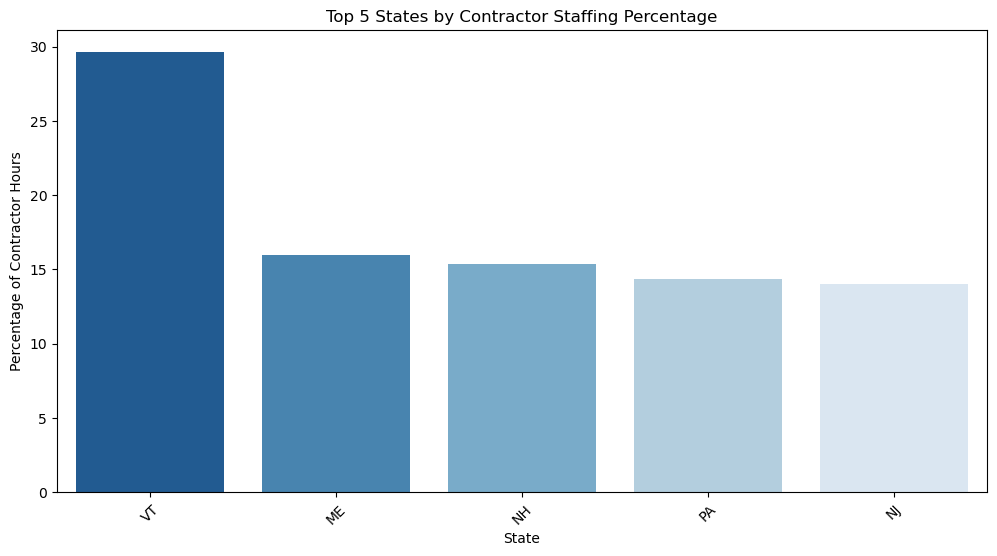

In [ ]:
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(
    x='STATE',
    y='Contractor_Percentage',
    data=top_states,
    palette='Blues_r'
)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Percentage of Contractor Hours')
plt.title('Top 5 States by Contractor Staffing Percentage')
plt.xticks(rotation=45)
plt.show()


## States with least contractors

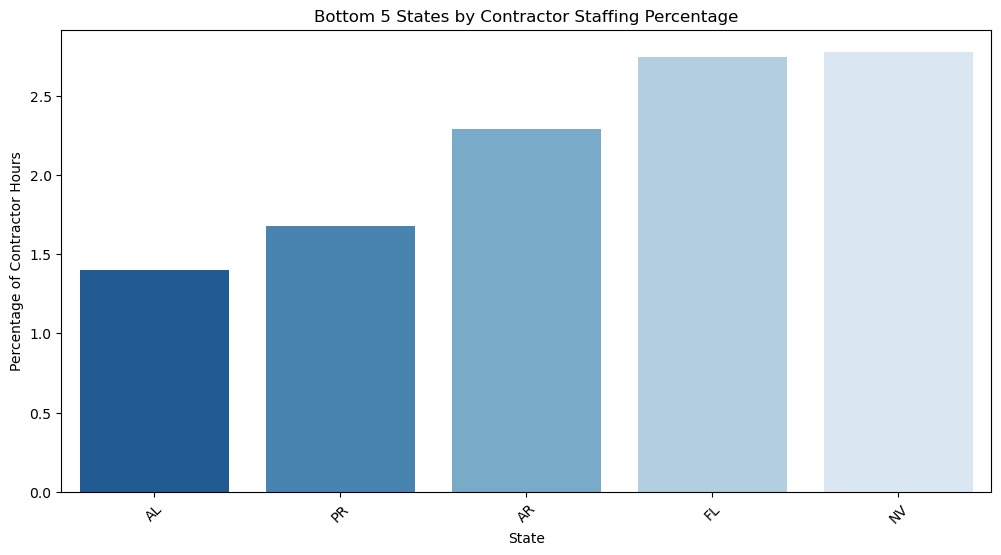

In [ ]:
bottom_states = state_summary.sort_values(by='Contractor_Percentage', ascending=True).head(5)

# Set figure size
#plt.figure(figsize=(12, 6))
sns.barplot(
    x='STATE',
    y='Contractor_Percentage',
    data=bottom_states,
    palette='Blues_r'
)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Percentage of Contractor Hours')
plt.title('Bottom 5 States by Contractor Staffing Percentage')

plt.xticks(rotation=45)
plt.show()


Focus on states with low contractors.

## Identify nursing homes rely heavily on contractor staff

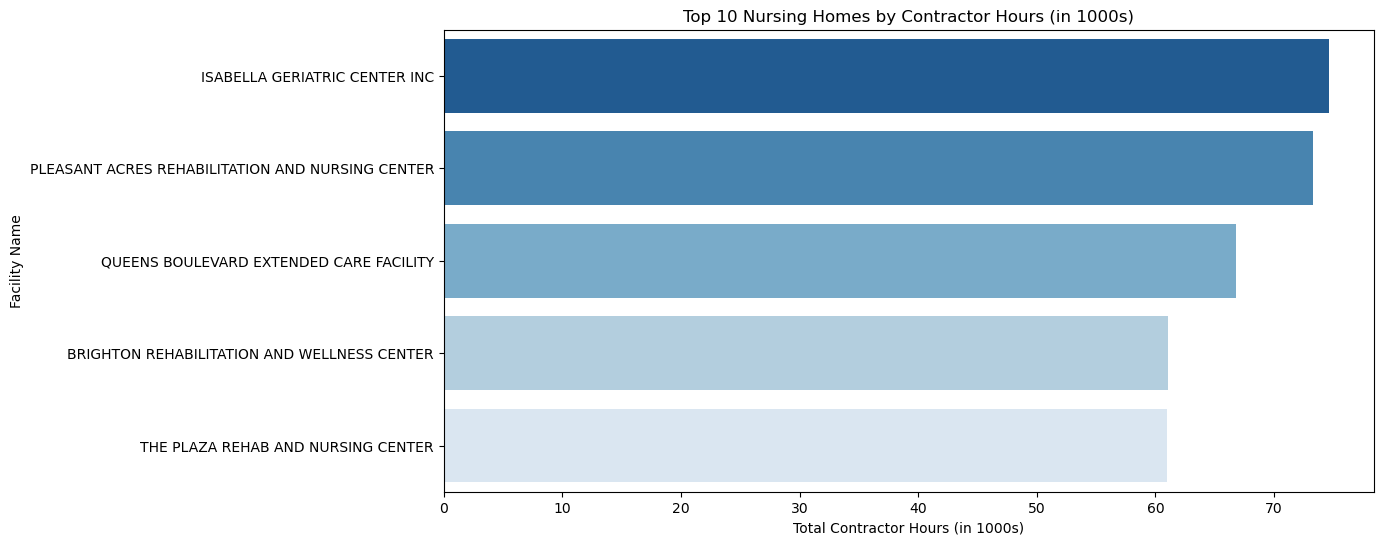

In [ ]:
contractor_pivot = df.pivot_table(
    index='PROVNAME',
    values='Total_Contractor_Hours',
    aggfunc='sum'
).reset_index()

# Sort facilities by contractor hours and select the top 5
contractor_heavy_facilities = contractor_pivot.sort_values(by='Total_Contractor_Hours', ascending=False).head(5)

# Scale contractor hours by 1000 for better visualization
contractor_heavy_facilities['Contractor_Hours_k'] = contractor_heavy_facilities['Total_Contractor_Hours'] / 1e3

# Set figure size
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot
sns.barplot(
    x='Contractor_Hours_k',
    y='PROVNAME',
    data=contractor_heavy_facilities,
    palette='Blues_r'
)

# Add labels and title
plt.xlabel("Total Contractor Hours (in 1000s)")
plt.ylabel("Facility Name")
plt.title("Top 5 Nursing Homes by Contractor Hours (in 1000s)")

# Show the plot
plt.show()


Prioritize these for sales targeting

## Identify Facilities with Fluctuating Staffing Needs


In [ ]:
# Calculate staffing fluctuation (standard deviation of contractor hours per facility)
staffing_fluctuation = df.groupby('PROVNAME')['Total_Contractor_Hours'].std().reset_index()

# Rename the column for clarity
staffing_fluctuation.rename(columns={'Total_Contractor_Hours': 'Staffing_Fluctuation'}, inplace=True)

# Get the top 10 facilities with the highest fluctuation
high_fluctuation_homes = staffing_fluctuation.sort_values(by='Staffing_Fluctuation', ascending=False).head(10)

# Print the results
print("Top 10 Nursing Homes with Fluctuating Staffing Needs:")
print(high_fluctuation_homes.to_string(index=False))


Top 10 Nursing Homes with Fluctuating Staffing Needs:
                                  PROVNAME  Staffing_Fluctuation
               MARIGOLD REHABILITATION HCC           1442.887583
         SANTA ANITA CONVALESCENT HOSPITAL            178.916301
                              SENECA PLACE            177.167533
       UNIVERSAL HEALTH CARE/FUQUAY-VARINA            134.260691
                       MAISON DE LAFAYETTE            132.537708
 BRANDON NURSING AND REHABILITATION CENTER            118.255171
CRYSTAL LAKE HEALTHCARE AND REHABILITATION            106.072208
             MORRIS VIEW HEALTHCARE CENTER            105.197167
                   ROCKY KNOLL HEALTH CARE            103.383979
          WORKMENS CIRCLE MULTICARE CENTER             99.546634


- A higher standard deviation means greater fluctuation in contractor usage.
- A lower standard deviation means consistent contractor hours.
If a facility is heavily reliant on full-time employees, they might struggle with unexpected shortages and benefit from temporary contractors.

## Find nursing homes with low contractor usage but high employee hours, meaning they may benefit from additional contractor flexibility.

In [ ]:
# Create a pivot table to calculate total contractor and employee hours per facility
pivot_table = df.pivot_table(
    index='PROVNAME',
    values=['Total_Contractor_Hours', 'Total_Employee_Hours'],
    aggfunc='sum'  # Sum hours per facility
)

# Calculate the Contractor-to-Employee Ratio
pivot_table['Contractor_to_Employee_Ratio'] = pivot_table['Total_Contractor_Hours'] / (pivot_table['Total_Employee_Hours'] + 1e-5)

# Get the bottom 10 facilities with the lowest ratio
low_contractor_usage = pivot_table.sort_values(by='Contractor_to_Employee_Ratio', ascending=True).head(20)

print("Nursing Homes with Low Contractor Usage but Potential for Flexibility:")
print(low_contractor_usage[['Contractor_to_Employee_Ratio']])


Nursing Homes with Low Contractor Usage but Potential for Flexibility:
                                   Contractor_to_Employee_Ratio
PROVNAME                                                       
15 CRAIGSIDE                                                0.0
MAJESTIC CARE OF NEW HAVEN                                  0.0
MAJESTIC CARE OF MCCORDSVILLE                               0.0
MAJESTIC CARE OF LIVONIA                                    0.0
MAJESTIC CARE OF LAFAYETTE                                  0.0
MAJESTIC CARE OF JEFFERSON POINTE                           0.0
MAJESTIC CARE OF GOSHEN                                     0.0
MAJESTIC CARE OF FORT WAYNE                                 0.0
MAJESTIC CARE OF FLUSHING                                   0.0
MAJESTIC CARE OF DEMING PARK                                0.0
MAJESTIC CARE OF COLUMBUS LLC                               0.0
MAJESTIC CARE OF CEDAR VILLAGE.                             0.0
MAJESTIC CARE OF CARMEL          

In [ ]:
# Count the number of facilities with a 0.0 ratio
zero_ratio_count = (pivot_table['Contractor_to_Employee_Ratio'] == 0.0).sum()

# Total number of facilities
total_facilities = len(pivot_table)

# Calculate the percentage
zero_ratio_percentage = (zero_ratio_count / total_facilities) * 100

print(f"Percentage of facilities with a 0.0 Contractor-to-Employee Ratio: {zero_ratio_percentage:.2f}%")


Percentage of facilities with a 0.0 Contractor-to-Employee Ratio: 39.21%


# Assess how employee vs contractor ratio affects overall rating

In [ ]:
#Define function to wrangle rating data
def wrangle(filepath):
    # Load data
    df = pd.read_excel(filepath)

    # Rename columns
    df.rename(columns={
        'Rating Cycle 1 Standard Survey Health Date': 'survey_date',
        'CMS Certification Number (CCN)': 'PROVNUM'  # Rename CCN column to PROVNUM
    }, inplace=True)

    # Drop NaN values
    df = df.dropna()

    # Convert 'PROVNUM' to string (removing decimals)
    df['PROVNUM'] = df['PROVNUM'].astype(int).astype(str)

    # Filter for 2024Q2
    mask = (df['survey_date'] >= '2024-04-01') & (df['survey_date'] <= '2024-06-30')
    df = df[mask]

    return df


In [ ]:
rating_df = wrangle(r'C:\Users\hp\Desktop\Clipboard_datasets\provider_info_clean.xlsx')
rating_df.head(5)

,PROVNUM,Provider Name,Provider Address,City/Town,State,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating,survey_date
19,15047,"NORTHWAY HEALTH AND REHABILITATION, LLC",1424 NORTH 25TH STREET,BIRMINGHAM,AL,2.0,2.0,2.0,3.0,2024-04-17
62,15134,BIRMINGHAM NURSING AND REHABILITATION CENTER EAST,733 MARY VANN LANE,BIRMINGHAM,AL,2.0,1.0,5.0,1.0,2024-05-13
133,15217,BIRMINGHAM NURSING AND REHABILITATION CTR LLC,1000 DUGAN AVENUE,BIRMINGHAM,AL,1.0,1.0,4.0,3.0,2024-06-26
185,15420,CUMBERLAND HEALTH AND REHAB,47065 AL HIGHWAY 277,BRIDGEPORT,AL,1.0,1.0,1.0,4.0,2024-06-03
187,15423,BROOKDALE UNIVERSITY PARK SNF (AL),501 UNIVERSITY PARK DRIVE,BIRMINGHAM,AL,1.0,1.0,4.0,3.0,2024-06-27


In [ ]:
rating_df.shape

(2703, 10)

In [ ]:
#merge dataframe
merged_df = rating_df.merge(df, on='PROVNUM', how='inner')
merged_df.shape

(217581, 45)

In [ ]:
merged_df.columns

Index(['PROVNUM', 'Provider Name', 'Provider Address', 'City/Town', 'State',
       'Overall Rating', 'Health Inspection Rating', 'QM Rating',
       'Staffing Rating', 'survey_date', 'PROVNAME', 'CITY', 'STATE',
       'COUNTY_NAME', 'COUNTY_FIPS', 'CY_Qtr', 'WorkDate', 'MDScensus',
       'Hrs_RNDON', 'Hrs_RNDON_emp', 'Hrs_RNDON_ctr', 'Hrs_RNadmin',
       'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr', 'Hrs_RN', 'Hrs_RN_emp',
       'Hrs_RN_ctr', 'Hrs_LPNadmin', 'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr',
       'Hrs_LPN', 'Hrs_LPN_emp', 'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp',
       'Hrs_CNA_ctr', 'Hrs_NAtrn', 'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr',
       'Hrs_MedAide', 'Hrs_MedAide_emp', 'Hrs_MedAide_ctr',
       'Total_Contractor_Hours', 'Total_Employee_Hours',
       'Contractor_Employee_Ratio'],
      dtype='object')

In [ ]:
# Define high and low-rated facilities
high_rated = merged_df[merged_df['Overall Rating'] >= 4]
low_rated = merged_df[merged_df['Overall Rating'] <= 2]

# Compare average contractor staffing
high_avg_staff = high_rated['Total_Contractor_Hours'].mean()
low_avg_staff = low_rated['Total_Contractor_Hours'].mean()

print(f"High-rated facilities: {high_avg_staff} contractor hours on avg")
print(f"Low-rated facilities: {low_avg_staff} contractor hours on avg")


High-rated facilities: 15.114015660985723 contractor hours on avg
Low-rated facilities: 28.636758091771743 contractor hours on avg


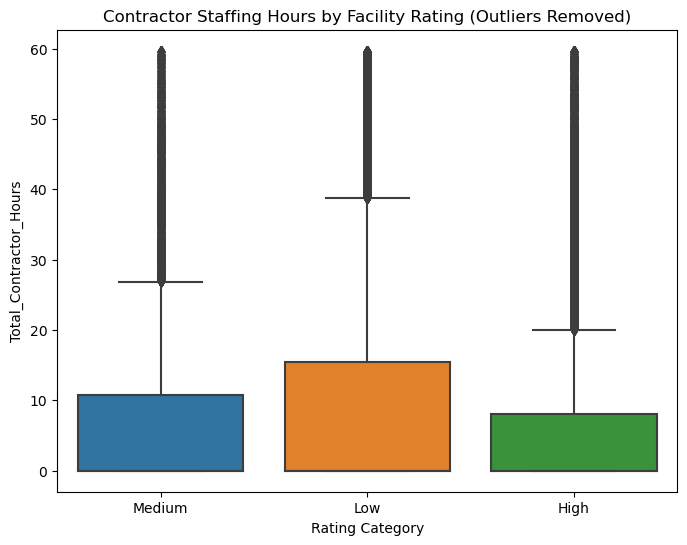

In [ ]:
# Categorize facilities
merged_df['Rating Category'] = merged_df['Overall Rating'].apply(lambda x: 'High' if x >= 4 else ('Low' if x <= 2 else 'Medium'))

# Compute Q1, Q3, and IQR for 'Total_Contractor_Hours'
Q1 = merged_df['Total_Contractor_Hours'].quantile(0.25)
Q3 = merged_df['Total_Contractor_Hours'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier removal
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove extreme outliers
filtered_df = merged_df[(merged_df['Total_Contractor_Hours'] >= lower_bound) &
                        (merged_df['Total_Contractor_Hours'] <= upper_bound)]

# Boxplot after removing extreme outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating Category', y='Total_Contractor_Hours', data=filtered_df)
plt.title("Contractor Staffing Hours by Facility Rating (Outliers Removed)")
plt.show()


# Findings

- Nearly 40% of all facilities rely primarily on full-time employees
- Alabama, Arkansas, Florida, and Nevada have the lowest number of contractors.
- Facilities like Marigold Rehabilitation HCC experience high fluctuations in contractor usage
- Some facilities, such as Issabela Geriatric Centre, primarily rely on contractor workers.
- Lower-rated facilities tend to use more contractors than full-time employees.

# Recommendations

- Expand Contractor Awareness in Employee-Heavy Facilities – Nearly 40% of nursing homes rely primarily on full-time employees, but they may struggle with unexpected staffing shortages. Highlight the benefits of flexible contractor staffing—reducing burnout, covering last-minute gaps, and ensuring patient care continuity.

- Unlock Growth in Underserved States – Alabama, Arkansas, Florida, and Nevada have the lowest contractor utilization. Target these states with data-driven outreach, demonstrating how contractor staffing reduces overtime costs and ensures compliance. Use case studies to build trust.

- Stabilize Workforce at High-Fluctuation Facilities – Facilities like Marigold Rehabilitation HCC experience staffing volatility. Position contractor staffing as a solution for consistent workforce planning, reducing uncertainty, and improving efficiency.

- Strengthen Relationships with Contractor-Preferred Facilities – Nursing homes like Issabela Geriatric Centre already embrace contractors. Differentiate our staffing solution by emphasizing superior quality, faster fulfillment, and cost advantages to secure long-term contracts.

- Support Low-Rated Facilities with Strategic Staffing – Lower-rated facilities rely more on contractors, likely due to retention and compliance issues. Offer a consultative approach to help stabilize operations, reduce turnover, and improve CMS ratings with a tailored contractor staffing plan.